In [35]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np


In [36]:
df = pd.read_csv("./charges.csv")
feature_names = ['Min_potential', 'Max_potential', 'Max_potential_grad', 'Min_potential_grad']

X = df[feature_names]
y = df["Channel"]
y = y.map({'KCN': 1, 'SCN': 0}).astype(int)

In [37]:
# standarize data

scalar = StandardScaler()
X = scalar.fit_transform(X)

# Decision Tree

In [38]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

In [39]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.63
|   |--- feature_3 <= 1.00
|   |   |--- feature_3 <= -0.09
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.09
|   |   |   |--- class: 1
|   |--- feature_3 >  1.00
|   |   |--- class: 0
|--- feature_2 >  0.63
|   |--- class: 0



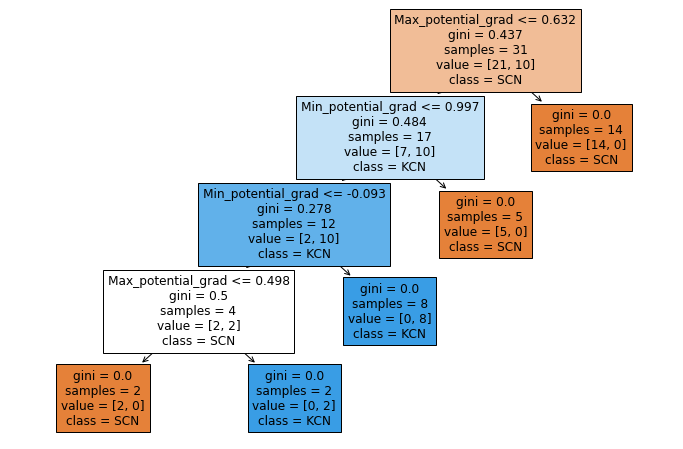

In [40]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=df["Channel"].unique(), filled=True)

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


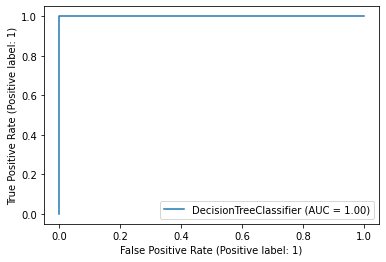

In [41]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# Logistic Regression

In [42]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X, y)

Feature weights:
['Min_potential: -0.5780527247026133', 'Max_potential: 1.1853211620835673', 'Max_potential_grad: 0.1886026654070755', 'Min_potential_grad: -0.0915078127806814']


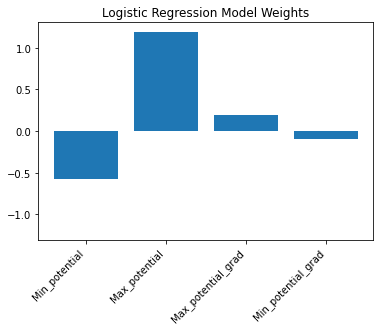

In [47]:
# Print feature weights

print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('Logistic Regression Model Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()

Accuracy: 0.7741935483870968
Recall: 0.3
F1: 0.4615384615384615


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


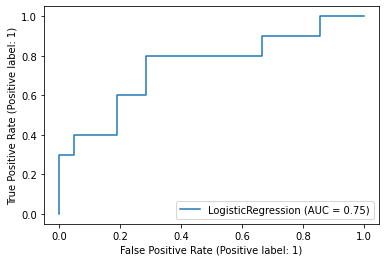

In [ ]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC rbf

In [ ]:
clf = SVC(random_state=0)
model = clf.fit(X, y)

In [ ]:
# TODO: Represent SVC for how it makes decisions

c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8709677419354839
Recall: 0.6
F1: 0.7499999999999999


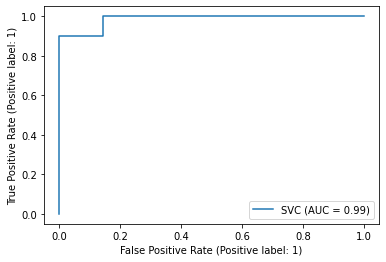

In [ ]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC linear

In [50]:
clf = SVC(random_state=0, kernel='linear')
model = clf.fit(X, y)


Accuracy: 0.7741935483870968
Recall: 0.3
F1: 0.4615384615384615


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


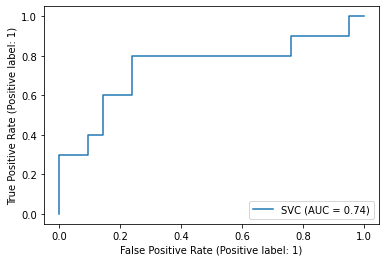

In [51]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

Feature weights:
['Min_potential: -0.45067876611071744', 'Max_potential: 1.0503143432792958', 'Max_potential_grad: 0.19222402719992737', 'Min_potential_grad: -0.013739279395707849']


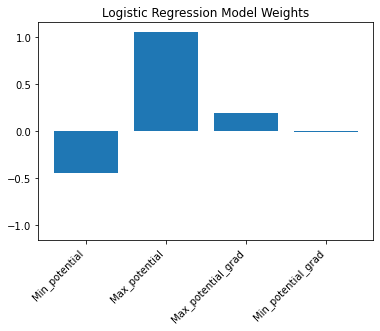

In [52]:
print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('Logistic Regression Model Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()